<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
# import plotly 
# version = plotly.__version__[:3]
# print("Current version: ", version)
# assert float(version) >= 4.7, 'please upgrade your plotly version to a new one'

Current version:  4.1


AssertionError: ignored

In [2]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.10.0)


In [3]:
import numpy as np
import pandas as pd

# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)
pd.set_option('display.max.columns', 100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Loading data

Data src: https://archive.ics.uci.edu/ml/datasets/adult

Github for raw data: [github.com/saravrajavelu](https://github.com/saravrajavelu/Adult-Income-Analysis/blob/master/adult.csv)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AH2Jk_XcIB_MmeoS5To5-SriwUAq55aNh7iNkI9QgYY7_NDsF1CUc8
Mounted at /content/drive


In [5]:
!cp '/content/drive/My Drive/Colab Notebooks/saturdays_ai/data/adult.data.csv' -r .

In [6]:
data = pd.read_csv('/content/adult.data.csv')
data = data.convert_dtypes()

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  Int64 
 1   workclass       32561 non-null  string
 2   fnlwgt          32561 non-null  Int64 
 3   education       32561 non-null  string
 4   education-num   32561 non-null  Int64 
 5   marital-status  32561 non-null  string
 6   occupation      32561 non-null  string
 7   relationship    32561 non-null  string
 8   race            32561 non-null  string
 9   sex             32561 non-null  string
 10  capital-gain    32561 non-null  Int64 
 11  capital-loss    32561 non-null  Int64 
 12  hours-per-week  32561 non-null  Int64 
 13  native-country  32561 non-null  string
 14  salary          32561 non-null  string
dtypes: Int64(6), string(9)
memory usage: 3.9 MB


# Missing values?


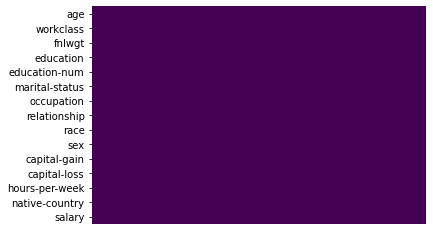

In [8]:
sns.heatmap(data.isnull().T, xticklabels=False, cbar=False, cmap='viridis')

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

No missing values

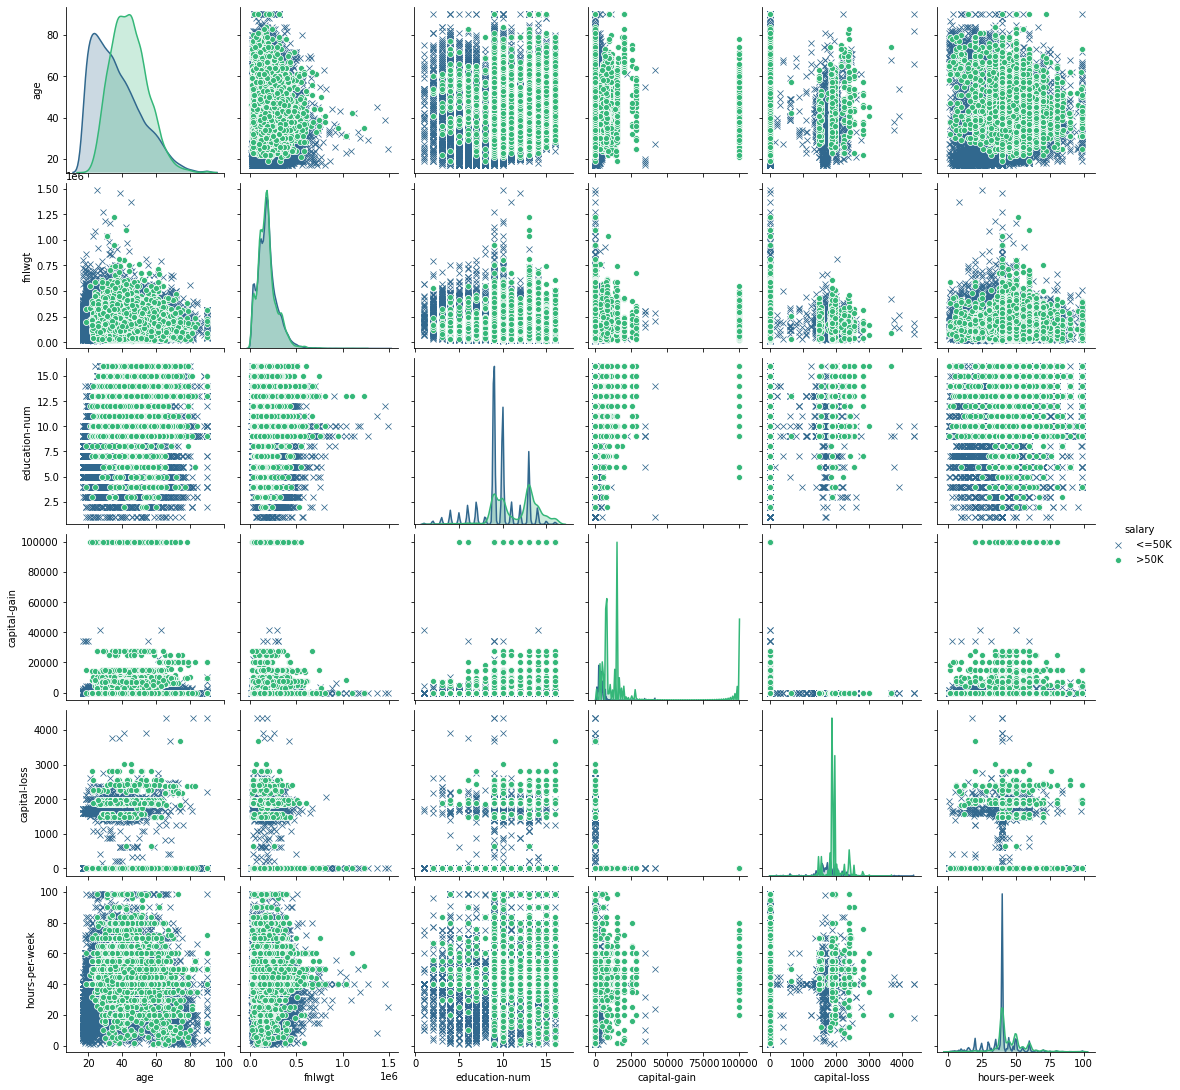

In [10]:
sns.pairplot(data, hue='salary',
             palette='viridis',
             markers=['x', 'o'])

#**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [11]:
# You code here
print(data['sex'].value_counts())


Male      21790
Female    10771
Name: sex, dtype: Int64


# **2. What is the average age (*age* feature) of women?**

In [12]:
# You code here
avg_age = data.query("sex == 'Female'")['age'].mean()
print(f'The average age for women is: {avg_age:.0f}')

The average age for women is: 37


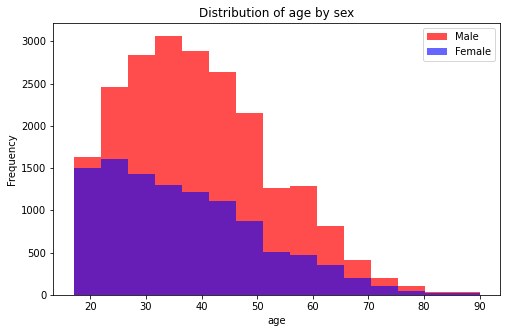

In [13]:
m = data.query("sex == 'Male'")
f = data.query("sex == 'Female'")

plt.figure(figsize=(8,5))
ax = m['age'].plot.hist(bins=15 ,color="red", alpha=0.7)
ax = f['age'].plot.hist(bins=15,color="blue", alpha=0.6)
plt.legend(['Male', 'Female'])
plt.xlabel('age')
plt.title('Distribution of age by sex');

# **3. What is the percentage of German citizens (*native-country* feature)?**

In [14]:
# You code here
pct = data[data['native-country'] == 'Germany']\
          ['native-country'].count() / len(data)*100
print(f'{pct:.2f}%')

0.42%


## Top 10 countries present in dataset

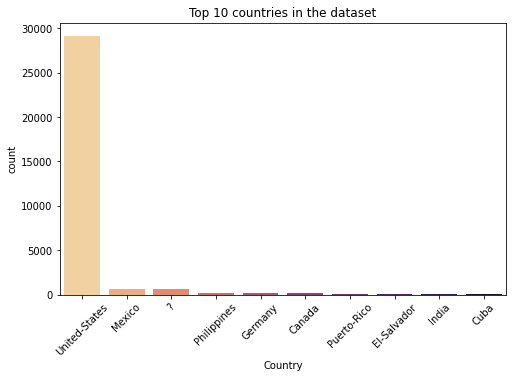

In [15]:
mpl.rcParams['figure.figsize'] = (8, 5)
sns.countplot(data['native-country'],
              order=data['native-country'].value_counts().index[:10],
              palette='magma_r')
plt.title('Top 10 countries in the dataset')
plt.xlabel('Country')
plt.xticks(rotation='45')
plt.show();

#**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year?**

In [16]:
# You code here
p_table = data.pivot_table(values='age',
                            index='salary',
                            columns=['sex'],
                            aggfunc=['mean', 'std'],
                            margins=True)
p_table

mean                  std              
sex    Female   Male    All Female   Male    All
salary                                          
<=50K   36.21  37.15  36.78  14.26  13.86  14.02
>50K    42.13  44.63  44.25  10.46  10.49  10.52
All     36.86  39.43  38.58  14.01  13.37  13.64

In [17]:
mean = p_table.loc['>50K', 'mean']['All']
std = p_table.loc['>50K', 'std']['All']
mean_2 = p_table.loc['<=50K', 'mean']['All']
std_2 = p_table.loc['<=50K', 'std']['All']

print(f'Mean age for people that earn more than 50K is: {mean:.1f} ± {std:.1f}')
print(f'Mean agefor people that earn less than 50K is: {mean_2:.1f} ± {std_2:.1f}')

Mean age for people that earn more than 50K is: 44.2 ± 10.5
Mean agefor people that earn less than 50K is: 36.8 ± 14.0


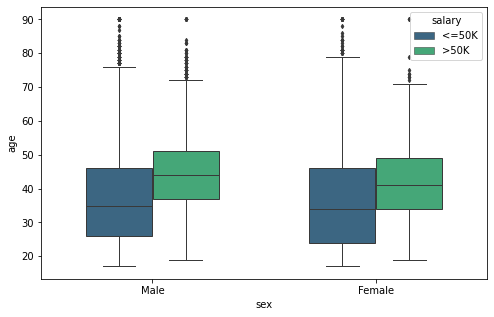

In [18]:
sns.boxplot(x='sex', y='age', data=data, hue='salary', 
            fliersize=3, linewidth=1, width=0.6, palette='viridis')

# **6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

* No

In [21]:
def color_if_any_val(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` if values it's greater
    than 0, black otherwise.
    """
    color = 'red' if val > 0 else 'black'
    return 'color: %s' % color

In [22]:
# You code here
p_table = data.pivot_table(values='age',
                            index='salary',
                            columns=['education'],
                            aggfunc='count')

p_table.style.applymap(color_if_any_val, subset=pd.IndexSlice['>50K':, :])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
salary,,,,,,,,,,,,,,,,
<=50K,871.00,1115.00,400.00,162.00,317.00,606.00,487.00,802.00,1021.00,3134.00,107.00,8826.00,764.00,51.00,153.00,5904.00
>50K,62.00,60.00,33.00,6.00,16.00,40.00,27.00,265.00,361.00,2221.00,306.00,1675.00,959.00,nan,423.00,1387.00


We can see that there are some people that earn more than 50K without having high school education

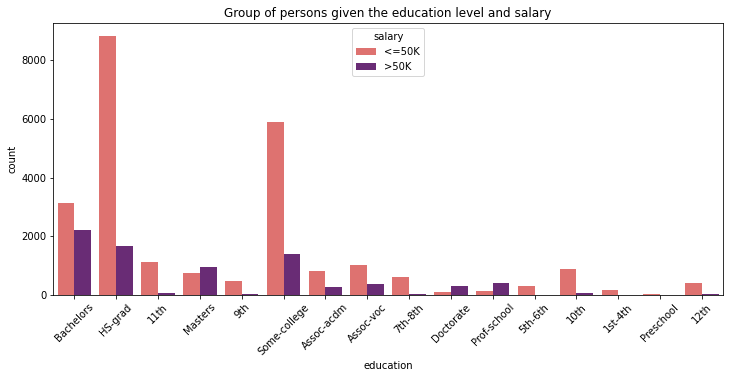

In [23]:
mpl.rcParams['figure.figsize'] = (12, 5)
sns.countplot(data['education'], hue=data['salary'], palette='magma_r')
plt.xticks(rotation='45')
plt.title('Group of persons given the education level and salary');

# **7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [24]:
# You code here
age_race_gender = data.groupby(['race', 'sex'])['age'].describe()
age_race_gender

count   mean    std   min   25%   50%    75%  \
race               sex                                                      
Amer-Indian-Eskimo Female    119.0  37.12  13.11  17.0  27.0  36.0  46.00   
                   Male      192.0  37.21  12.05  17.0  28.0  35.0  45.00   
Asian-Pac-Islander Female    346.0  35.09  12.30  17.0  25.0  33.0  43.75   
                   Male      693.0  39.07  12.88  18.0  29.0  37.0  46.00   
Black              Female   1555.0  37.85  12.64  17.0  28.0  37.0  46.00   
                   Male     1569.0  37.68  12.88  17.0  27.0  36.0  46.00   
Other              Female    109.0  31.68  11.63  17.0  23.0  29.0  39.00   
                   Male      162.0  34.65  11.36  17.0  26.0  32.0  42.00   
White              Female   8642.0  36.81  14.33  17.0  25.0  35.0  46.00   
                   Male    19174.0  39.65  13.44  17.0  29.0  38.0  49.00   

                            max  
race               sex           
Amer-Indian-Eskimo Female  80.0  
                   Male    82.0  
Asian-Pac-Islander Female  75.0  
                   Male    90.0  
Black              Female  90.0  
                   Male    90.0  
Other              Female  74.0  
                   Male    77.0  
White              Female  90.0  
                   Male    90.0

In [25]:
age_race_gender.loc['Amer-Indian-Eskimo', 'Male']['max']

82.0

# **8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [26]:
# You code here
data['isMarried'] = data['marital-status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Single')
data.query("salary == '>50K' & sex == 'Male'")['isMarried'].value_counts()



Married    5965
Single      697
Name: isMarried, dtype: int64

# **9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [33]:
data[data['hours-per-week'] == 99]['salary'].value_counts()

<=50K    60
>50K     25
Name: salary, dtype: Int64

In [27]:
# You code here
print(f"maximum number of hours: {data['hours-per-week'].max()}")
print(len(data[data['hours-per-week'] == 99]), 'people works 99 hours', '\n')
print('Percentege of people that works 99 hours per week:')
data[data['hours-per-week'] == 99]['salary'].value_counts()/85 * 100

maximum number of hours: 99
85 people works 99 hours 

Percentege of people that works 99 hours per week:


<=50K    70.59
>50K     29.41
Name: salary, dtype: float64

# **10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [43]:
data.groupby('native-country')['hours-per-week'].mean()

native-country
?                             41.51
Cambodia                      40.89
Canada                        40.40
China                         37.79
Columbia                      39.07
Cuba                          39.16
Dominican-Republic            42.47
Ecuador                       39.57
El-Salvador                   36.79
England                       41.83
France                        45.07
Germany                       41.01
Greece                        44.24
Guatemala                     39.23
Haiti                         36.91
Holand-Netherlands            40.00
Honduras                      36.31
Hong                          40.90
Hungary                       35.62
India                         41.53
Iran                          43.98
Ireland                       42.42
Italy                         41.60
Jamaica                       38.59
Japan                         43.69
Laos                          40.33
Mexico                        40.34
Nicaragua    

In [44]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary', 'isMarried'],
      dtype='object')

In [48]:
avg_time_salary_country= data.pivot_table(values='hours-per-week',
                                          index='native-country',
                                          columns='salary',
                                          aggfunc='mean',
                                          margins=True,
                                          margins_name='avg-hours-per-week')
                                          
avg_time_salary_country

salary,<=50K,>50K,avg-hours-per-week
native-country,,,
?,40.16,45.55,41.51
Cambodia,41.42,40.00,40.89
Canada,37.91,45.64,40.40
China,37.38,38.90,37.79
Columbia,38.68,50.00,39.07
Cuba,37.99,42.44,39.16
Dominican-Republic,42.34,47.00,42.47
Ecuador,38.04,48.75,39.57
El-Salvador,36.03,45.00,36.79


In [49]:
print('Avegare time of work for Japan:')
print(avg_time_salary_country.loc['Japan'])

Avegare time of work for Japan:
salary
<=50K                 41.00
>50K                  47.96
avg-hours-per-week    43.69
Name: Japan, dtype: float64


In [32]:
import plotly.express as px

df = avg_time_salary_country.iloc[:-1].sort_values(by='avg-hours-per-week',
                                                   ascending=False)

fig = px.bar(data_frame=df, 
             y='avg-hours-per-week', 
             x=df.index, 
             text='avg-hours-per-week',
             hover_data={"<=50K": ":.2f",
                         ">50K":  ":.2f"},
             )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(marker_color='rgb(158,202,225)',
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(hoverlabel=dict(bgcolor="white", 
                                  font_size=16, 
                                  font_family="Rockwell"
    )
)
fig.show()